In [47]:
tasmia = "In the name of Allah, the most benoficient, the most merciful"
tasmia

'In the name of Allah, the most benoficient, the most merciful'

### Import Libraries

In [1]:
import re
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Handling Text in Python

In [49]:
# Length of string (characters)

text = "Data Science is an emerging field."
len(text)

34

In [50]:
# Total Words

words = text.split(" ")
words

['Data', 'Science', 'is', 'an', 'emerging', 'field.']

In [51]:
print("Total words in text =", len(words))

Total words in text = 6


**Long Words**

In [52]:
lw = [l for l in words if len(l) > 3]
lw

['Data', 'Science', 'emerging', 'field.']

**Capitalize Words**

In [53]:
cw = [c for c in words if c.istitle()]
cw

['Data', 'Science']

**Unique Words**

In [54]:
text2 = "To be or not to be"

words2 = text2.split(" ")
set(words2)

{'To', 'be', 'not', 'or', 'to'}

In [55]:
# To comes two times because of capitalization

sw = set([w.lower() for w in words2])
sw

{'be', 'not', 'or', 'to'}

**Words to Characters**

In [56]:
text3 = 'ouagadougou'
text3.split("ou")

['', 'agad', 'g', '']

**Cleaning Text**

In [57]:
text4 = "    A quick brown fox jumped over the lazy dog. "

# Remove whitespace
clean_text = text4.strip()
clean_text

'A quick brown fox jumped over the lazy dog.'

**Find Words at Index**

In [58]:
clean_text.find("fox")

14

**Find Hashtags**

In [59]:
text5 = '"Ethics are built right into the ideals and objectives of the United Nations" \
#UNSG @ NY Society for Ethical Culture bit.ly/2guVelr'

In [60]:
[h for h in text5.split() if h.startswith("#")]

['#UNSG']

**Finding Callouts:**

In [61]:
text7 = '@UN @UN_Women "Ethics are built right into the ideals and objectives of the United Nations" \
#UNSG @NY_Society for Ethical Culture bit.ly/2guVelr'

In [62]:
[t for t in text7.split() if t.startswith("@")]

['@UN', '@UN_Women', '@NY_Society']

**Print Hashtags**

In [63]:
tweet = "@nltk Text analysis is awesome! #regex #pandas #python"

hashtags = [t for t in tweet.split() if t.startswith("#")]
hashtags

['#regex', '#pandas', '#python']

### Regex with Pandas and Named Groups

In [64]:
time_sentences = ["Monday: The doctor's appointment is at 2:45pm.", 
                  "Tuesday: The dentist's appointment is at 11:30 am.",
                  "Wednesday: At 7:00pm, there is a basketball game!",
                  "Thursday: Be back home by 11:15 pm at the latest.",
                  "Friday: Take the train at 08:10 am, arrive at 09:00am."]

df = pd.DataFrame(time_sentences, columns=['text'])
df

,text
0,Monday: The doctor's appointment is at 2:45pm.
1,Tuesday: The dentist's appointment is at 11:30...
2,"Wednesday: At 7:00pm, there is a basketball game!"
3,Thursday: Be back home by 11:15 pm at the latest.
4,"Friday: Take the train at 08:10 am, arrive at ..."


**Number of Characters in each Text**

In [65]:
df["characters"] = df["text"].str.len()
df

,text,characters
0,Monday: The doctor's appointment is at 2:45pm.,46
1,Tuesday: The dentist's appointment is at 11:30...,50
2,"Wednesday: At 7:00pm, there is a basketball game!",49
3,Thursday: Be back home by 11:15 pm at the latest.,49
4,"Friday: Take the train at 08:10 am, arrive at ...",54


**Number of Words in each Text**

In [66]:
df["words"] = df["text"].str.split().str.len()
df

,text,characters,words
0,Monday: The doctor's appointment is at 2:45pm.,46,7
1,Tuesday: The dentist's appointment is at 11:30...,50,8
2,"Wednesday: At 7:00pm, there is a basketball game!",49,8
3,Thursday: Be back home by 11:15 pm at the latest.,49,10
4,"Friday: Take the train at 08:10 am, arrive at ...",54,10


**find which entries contain the word 'appointment'**

In [67]:
df["text"].str.contains("appointment")

0     True
1     True
2    False
3    False
4    False
Name: text, dtype: bool

**find how many times a digit occurs in each string**

In [68]:
df["text"].str.count(r'\d')

0    3
1    4
2    3
3    4
4    8
Name: text, dtype: int64

**Create new columns from first match of extracted groups**

In [69]:
df["text"].str.extractall(r'((\d?\d):(\d\d) ?([ap]m))')

0   1   2   3
  match                      
0 0        2:45pm   2  45  pm
1 0      11:30 am  11  30  am
2 0        7:00pm   7  00  pm
3 0      11:15 pm  11  15  pm
4 0      08:10 am  08  10  am
  1       09:00am  09  00  am

**extract the hours, the minutes, and the period with group names**

In [70]:
df["text"].str.extractall(r'(?P<hour>\d?\d):(?P<minute>\d\d) ?(?P<period>[ap]m)')

hour minute period
  match                   
0 0        2     45     pm
1 0       11     30     am
2 0        7     00     pm
3 0       11     15     pm
4 0       08     10     am
  1       09     00     am

### Sentiment Analysis

In [71]:
df = pd.read_csv("Amazon_Unlocked_Mobile.csv")
df.sample(5)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
58569,Apple iPhone 6 Plus Factory Unlocked Cellphone...,Apple,605.00,4,"It arrived early; however, seems to work bette...",0.0
322490,Samsung Galaxy Note 3 (SM-N900V) - 32GB Verizo...,Samsung,209.99,5,I bought this phone hoping for the best and so...,2.0
169178,CNPGD [U.S. Office Extended Warranty] Smartwat...,CNPGD,59.99,1,This is the worst thing ever happen to me I bo...,1.0
131761,BLU PURE XL Smartphone - 4G LTE GSM Unlocked -...,BLU,129.99,5,"For comparison, the past few years I've owned ...",0.0
291391,Pantech Pocket P9060 Unlocked GSM Phone with A...,NaN,54.88,5,Great gift. Easy to use .memory is absorbed by...,0.0


**Drop null values**

In [72]:
df = df.dropna()

**Remove neutral rating**

In [73]:
df = df[df["Rating"] != 3]

**Encode 4 & 5 as 1 (positive) and 1 & 2 as 0 (negative)**

In [74]:
df["Positively Rated"] = np.where(df["Rating"] > 3, 1, 0)
df.sample(5)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Positively Rated
107996,BLU Dash 5.5 Smartphone - Unlocked - Retail Pa...,BLU,99.99,5,"Great phone, only problem I could not get the ...",1.0,1
146233,BLU Studio C 5+5 LTE Smartphone - GSM Unlocked...,BLU,99.00,5,The 5 stars is not because this is the best ph...,0.0,1
60113,"Apple iPhone 6 Plus Unlocked Cellphone, 16GB, ...",Apple,519.00,5,nice,0.0,1
219931,LG G3 D855 16GB Metallic Black Factory Unlocke...,LG,275.00,5,Very good,0.0,1
348556,Samsung Galaxy S5 G900A 16GB Unlocked GSM 4G L...,Samsung,219.00,1,"We could not get this to work with my carrier,...",1.0,0


**Rating distribution**

In [75]:
df["Positively Rated"].value_counts()

1    230674
0     77603
Name: Positively Rated, dtype: int64

**Data Preparation**

In [76]:
# Feature
X = df["Reviews"]

# Target
y = df["Positively Rated"]

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 0,
                                                    stratify = y)

### Count Vectorizer

In [77]:
# Count Vectorizer Object
vect = CountVectorizer(stop_words = ENGLISH_STOP_WORDS)

# Fit Training Data
vect.fit(X_train)

# Check Total Features
len(vect.get_feature_names())

54075

**Fit Transform**

In [78]:
# Fit-transform Training Data
train_vectorizer = vect.fit_transform(X_train)

# Transform Test Data
test_vectorizer = vect.transform(X_test)

**Logistic Regression using CountVectorizer**

In [79]:
# Logistic Regression
lr = LogisticRegression()

# Fit Training Data
lr.fit(train_vectorizer, y_train)

# Prediction
lr_pred = lr.predict(test_vectorizer)

pd.DataFrame({"Actual": y_test,
              "Predicted": lr_pred}).sample(5)

,Actual,Predicted
84007,0,0
240749,1,0
116097,0,0
315442,1,1
188854,1,1


**Confusion Matrix**

In [80]:
pd.DataFrame(confusion_matrix(y_test, lr_pred))

,0,1
0,13329,2192
1,1188,44947


**Classification Report**

In [81]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89     15521
           1       0.95      0.97      0.96     46135

    accuracy                           0.95     61656
   macro avg       0.94      0.92      0.93     61656
weighted avg       0.94      0.95      0.94     61656



**Actual and Predicted Outcome Density Comparison (CountVectorizer)**

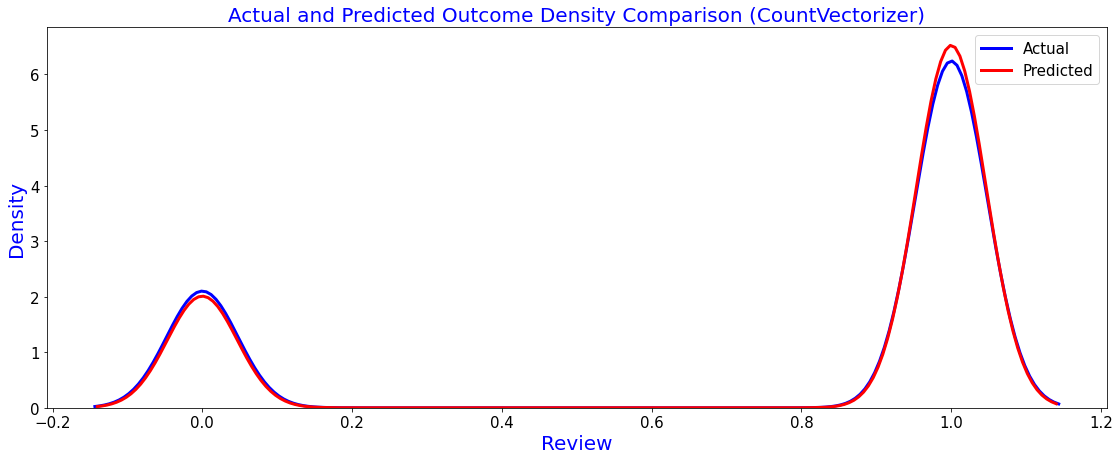

In [94]:
plt.figure(figsize = (19, 7))
sns.kdeplot(y_test, label = "Actual", linewidth = 3, color = "blue")
sns.kdeplot(lr_pred, label = "Predicted", linewidth = 3, color = "red")
plt.title("Actual and Predicted Outcome Density Comparison (CountVectorizer)", color = "blue", size = 20)
plt.xlabel("Review", size = 20, color = "blue")
plt.ylabel("Density", size = 20, color = "blue")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={"size":15})
plt.show()

**Custom Prediction**

In [88]:
cplr = lr.predict(vect.transform(['not an issue, phone is working',
                                'an issue, phone is not working']))
print(cplr)

[1 1]


### TfidfVectorizer

In [89]:
# TfidfVectorizer Object
tfidf = TfidfVectorizer(stop_words = ENGLISH_STOP_WORDS)

# Fit Transform Training Data
tfidf_train = tfidf.fit_transform(X_train)

# Transform Test Data
tfidf_test = tfidf.transform(X_test)

**Logistic Regression using TfidfVectorizer**

In [90]:
# Logistic Regression Object
lrtv = LogisticRegression()

# Fit training set
lrtv.fit(tfidf_train, y_train)

# Prediction
pred_lrtv = lrtv.predict(tfidf_test)

# Actual and Predicted Values
pd.DataFrame({"Actual": y_test,
              "Predicted": pred_lrtv}).sample(5)

,Actual,Predicted
292326,1,1
67564,0,1
396134,1,0
102681,0,1
75405,1,1


**Confusion Matrix**

In [91]:
pd.DataFrame(confusion_matrix(y_test, pred_lrtv))

,0,1
0,13440,2081
1,1378,44757


**Classification Report**

In [92]:
print(classification_report(y_test, pred_lrtv))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89     15521
           1       0.96      0.97      0.96     46135

    accuracy                           0.94     61656
   macro avg       0.93      0.92      0.92     61656
weighted avg       0.94      0.94      0.94     61656



**Actual and Predicted Outcome Density Comparison (TfidfVectorizer)**

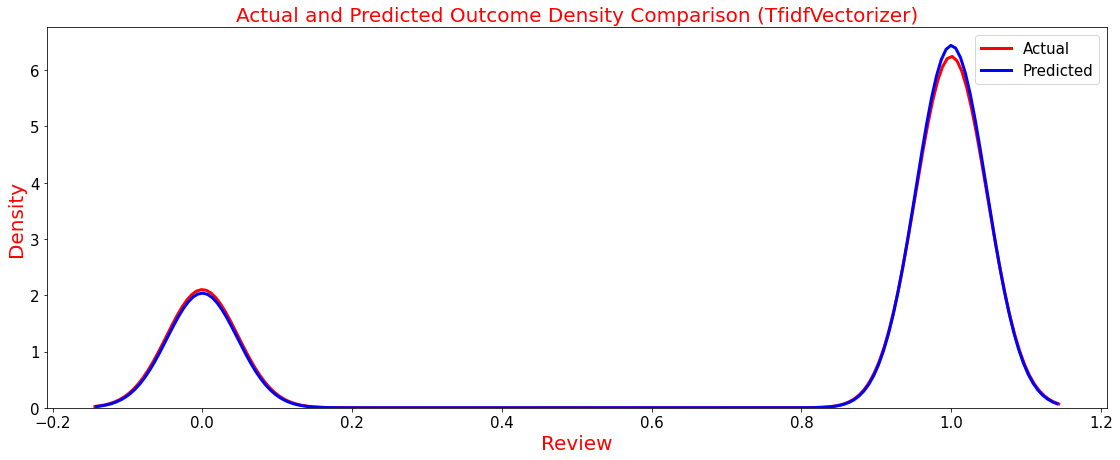

In [93]:
plt.figure(figsize = (19, 7))
sns.kdeplot(y_test, label = "Actual", linewidth = 3, color = "red")
sns.kdeplot(pred_lrtv, label = "Predicted", linewidth = 3, color = "blue")
plt.title("Actual and Predicted Outcome Density Comparison (TfidfVectorizer)", color = "red", size = 20)
plt.xlabel("Review", size = 20, color = "red")
plt.ylabel("Density", size = 20, color = "red")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={"size":15})
plt.show()

**Custom Prediction**

In [95]:
cptv = lrtv.predict(tfidf.transform(['not an issue, phone is working',
                                    'an issue, phone is not working']))
print(cptv)

[1 1]


### n-grams

In [111]:
# Count Vectorizer with Bigram
vect = CountVectorizer(min_df=5, ngram_range=(1,2))

# Fit Transform Training Data
vectg_train = vect.fit_transform(X_train)

# Transform Test Data
vectg_test = vect.transform(X_test)

**Logistic Regression (ngram)**

In [112]:
# Logistic Regression Object
lr_n = LogisticRegression()

# fit training Data

lr_n.fit(vectg_train, y_train)

# Prediction
lrm_pred = lr_n.predict(vectg_test)

# Actual vs Predicted Values
pd.DataFrame({"Actual": y_test,
              "Predicted": lrm_pred}).sample(5)

,Actual,Predicted
158382,1,1
317167,1,1
159753,0,1
276781,1,1
338642,1,1


**Confusion Matrix**

In [113]:
pd.DataFrame(confusion_matrix(y_test, lrm_pred))

,0,1
0,14589,932
1,665,45470


**Classification Report**

In [114]:
print(classification_report(y_test, lrm_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     15521
           1       0.98      0.99      0.98     46135

    accuracy                           0.97     61656
   macro avg       0.97      0.96      0.97     61656
weighted avg       0.97      0.97      0.97     61656



**Actual and Predicted Outcome Density Comparison (Ngram)**

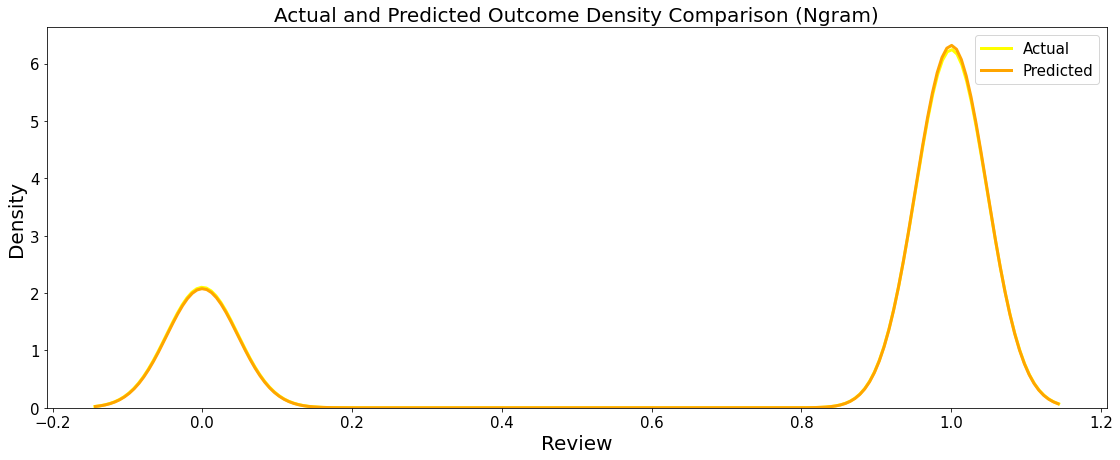

In [115]:
plt.figure(figsize = (19, 7))
sns.kdeplot(y_test, label = "Actual", linewidth = 3, color = "yellow")
sns.kdeplot(lrm_pred, label = "Predicted", linewidth = 3, color = "orange")
plt.title("Actual and Predicted Outcome Density Comparison (Ngram)", size = 20)
plt.xlabel("Review", size = 20)
plt.ylabel("Density", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={"size":15})
plt.show()

**Custom Prediction (Ngram)**

In [116]:
cpn = lr_n.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working']))
cpn

array([1, 0])

### Spam Classification

In [117]:
# Print 5 Samples

df = pd.read_csv("spam.csv")
df.sample(5)

,text,target
47,"Fair enough, anything going on?",ham
3878,She left it very vague. She just said she woul...,ham
5374,Do u konw waht is rael FRIENDSHIP Im gving yuo...,ham
3987,Hello. Sort of out in town already. That . So ...,ham
4519,What to think no one saying clearly. Ok leave ...,ham


**Assign Labels**

In [119]:
df["target"] = np.where(df["target"] == "spam", 1, 0)
df.sample(5)

,text,target
4830,Po de :-):):-):-):-). No need job aha.,0
5418,So how are you really. What are you up to. How...,0
2801,And smile for me right now as you go and the w...,0
1961,LOL that would be awesome payback.,0
4386,S.i'm watching it in live..,0


**Percentage of Spam**

In [129]:
pd.DataFrame((df["target"].value_counts(normalize = True) * 100).round(2))

,target
0,86.59
1,13.41


**Length of Documents**

In [158]:
df["characters"] = df["text"].str.len()

In [166]:
# Spam Documents Length

dfs = df[df["target"] == 1]
print("Average Length of Spam Documents =", round(dfs["characters"].mean(), 2))

Average Length of Spam Documents = 138.87


**Ham Document Length**

In [167]:
# Ham Documents Length

dfh = df[df["target"] == 0]
print("Average Length of Ham Documents =", round(dfh["characters"].mean(), 2))

Average Length of Ham Documents = 71.02


**Data Preparation**

In [131]:
# Feature
X = df["text"]

# Target
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.1,
                                                    stratify = y,
                                                    random_state = 0)

### Count Vectorizer

In [137]:
# Count Vectorizer Object
vect = CountVectorizer(stop_words = ENGLISH_STOP_WORDS)

# Fit Transform Training Set
vect_train = vect.fit_transform(X_train)

# Transform Test Set
vect_test = vect.transform(X_test)

**Multinomial Naive Bayes**

In [139]:
# MultinomialNB Object
nb = MultinomialNB(alpha = 0.1)

# Fit Training Set
nb.fit(vect_train, y_train)

# Prediction
nb_pred = nb.predict(vect_test)

# Actual vs Predicted Values
pd.DataFrame({"Actual": y_test,
              "Predicted": nb_pred}).sample(5)

,Actual,Predicted
2287,0,0
2233,0,0
1553,0,0
864,0,0
323,0,0


**Confusion Matrix**

In [143]:
pd.DataFrame(confusion_matrix(y_test, nb_pred))

,0,1
0,479,4
1,9,66


**Classification Report**

In [144]:
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       483
           1       0.94      0.88      0.91        75

    accuracy                           0.98       558
   macro avg       0.96      0.94      0.95       558
weighted avg       0.98      0.98      0.98       558



**Actual and Predicted Outcome Density Comparison (MultinomialNB)**

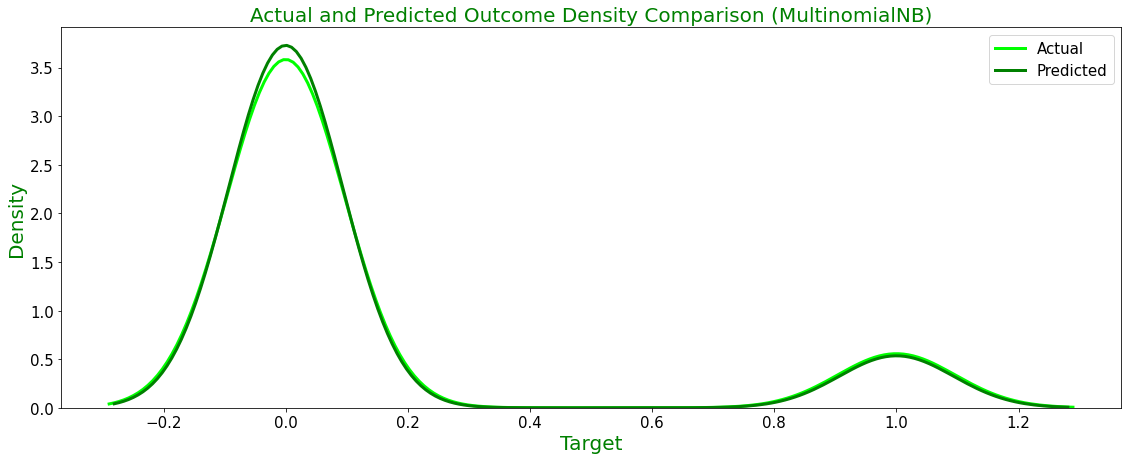

In [155]:
plt.figure(figsize = (19, 7))
sns.kdeplot(y_test, label = "Actual", linewidth = 3, color = "lime")
sns.kdeplot(nb_pred, label = "Predicted", linewidth = 3, color = "green")
plt.title("Actual and Predicted Outcome Density Comparison (MultinomialNB)", size = 20, color = "green")
plt.xlabel("Target", size = 20, color = "green")
plt.ylabel("Density", size = 20, color = "green")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={"size":15})
plt.show()

### Tfidf Vectorizer

In [146]:
# Tfidf Vectorizer Object
tfidf = TfidfVectorizer(min_df = 3, stop_words = ENGLISH_STOP_WORDS)

# Fit Trasform Training Set
tfidf_train = tfidf.fit_transform(X_train)

# Transform Test Set
tfidf_test = tfidf.transform(X_test)

**Multinomial Naive Bayes**

In [152]:
# MultinomialNB Object
nb = MultinomialNB(alpha = 0.1)

# Fit Training Set
nb.fit(tfidf_train, y_train)

# Predict Testing Set
pred_nbt = nb.predict(tfidf_test)

# Actual vs Predicted Outcome
pd.DataFrame({"Actual": y_test,
              "Predicted": pred_nbt}).sample(5)

,Actual,Predicted
2822,0,0
4899,1,1
5382,0,0
2233,0,0
4829,0,0


**Confusion Matrix**

In [153]:
pd.DataFrame(confusion_matrix(y_test, pred_nbt))

,0,1
0,478,5
1,10,65


**Classification Report**

In [154]:
print(classification_report(y_test, pred_nbt))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       483
           1       0.93      0.87      0.90        75

    accuracy                           0.97       558
   macro avg       0.95      0.93      0.94       558
weighted avg       0.97      0.97      0.97       558



**Actual and Predicted Outcome Density Comparison**

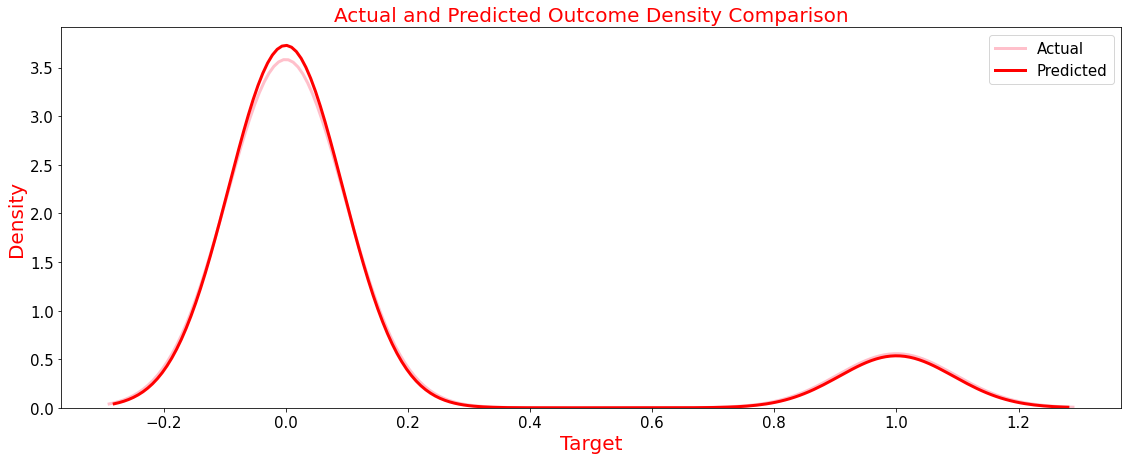

In [157]:
plt.figure(figsize = (19, 7))
sns.kdeplot(y_test, label = "Actual", linewidth = 3, color = "pink")
sns.kdeplot(pred_nbt, label = "Predicted", linewidth = 3, color = "red")
plt.title("Actual and Predicted Outcome Density Comparison", size = 20, color = "red")
plt.xlabel("Target", size = 20, color = "red")
plt.ylabel("Density", size = 20, color = "red")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={"size":15})
plt.show()